In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [119]:
def read_measurements_file(file_path):
    algorithms = []
    compLevels = []
    shuffles = []
    times = []
    sizes = []

    # 65 events, no ZS, 2600us
    with open(file_path) as f:
        data = f.read().splitlines()
        for line in data:
            dataSplit = line.split(" ")
            algorithm = dataSplit[0].replace("(", "").replace(",", "")
            compLevel = dataSplit[2].replace(",", "").replace(")", "")
            shuffle = "no-shuffle"
            offset = 0
            if algorithm != "hdf5":
                shuffle = dataSplit[3+offset].replace(")", "")
                offset = 1
            time = dataSplit[4+offset]
            size = dataSplit[7+offset]
            print(algorithm, compLevel, shuffle, time, size)
            algorithms.append(algorithm)
            compLevels.append(int(compLevel))
            shuffles.append(shuffle)
            times.append(int(time))
            sizes.append(int(size))
                       
    df = pd.DataFrame({
        "Algorithm": algorithms,
        "Compression Level": compLevels,
        "Shuffle": shuffles,
        "Time": times,
        "Size": sizes
    })

    df = df.groupby(["Algorithm", "Compression Level", "Shuffle"]).mean().reset_index()
    return df

In [120]:
df = read_measurements_file("measures.txt")
df_zs = read_measurements_file("measures_zs.txt")

blosclz 0 no-shuffle 8204 2452909560
blosclz 0 no-shuffle 7072 2452909560
blosclz 0 no-shuffle 8568 2452909560
blosclz 0 byte-shuffle 8754 2452909560
blosclz 0 byte-shuffle 8805 2452909560
blosclz 0 byte-shuffle 8766 2452909560
blosclz 0 bit-shuffle 8924 2452909560
blosclz 0 bit-shuffle 8621 2452909560
blosclz 0 bit-shuffle 8544 2452909560
blosclz 1 no-shuffle 7144 1738257981
blosclz 1 no-shuffle 9833 1738257981
blosclz 1 no-shuffle 9745 1738257981
blosclz 1 byte-shuffle 8700 969031268
blosclz 1 byte-shuffle 7835 969031268
blosclz 1 byte-shuffle 8286 969031268
blosclz 1 bit-shuffle 8248 740784192
blosclz 1 bit-shuffle 8228 740784192
blosclz 1 bit-shuffle 8251 740784192
blosclz 2 no-shuffle 14928 1132700882
blosclz 2 no-shuffle 13751 1132700882
blosclz 2 no-shuffle 14958 1132700882
blosclz 2 byte-shuffle 9632 897043503
blosclz 2 byte-shuffle 9739 897043503
blosclz 2 byte-shuffle 9685 897043503
blosclz 2 bit-shuffle 9949 653265363
blosclz 2 bit-shuffle 9899 653265363
blosclz 2 bit-shuffl

In [114]:
algorithms = df["Algorithm"].unique()
shuffles = df["Shuffle"].unique()

# No ZS, 2000us buffer, 65 events, alphas

blosclz bit-shuffle
blosclz byte-shuffle
blosclz no-shuffle
hdf5 bit-shuffle
hdf5 byte-shuffle
hdf5 no-shuffle
lz4 bit-shuffle
lz4 byte-shuffle
lz4 no-shuffle
lz4hc bit-shuffle
lz4hc byte-shuffle
lz4hc no-shuffle
snappy bit-shuffle
snappy byte-shuffle
snappy no-shuffle
zlib bit-shuffle
zlib byte-shuffle
zlib no-shuffle


(0.0, 60.0)

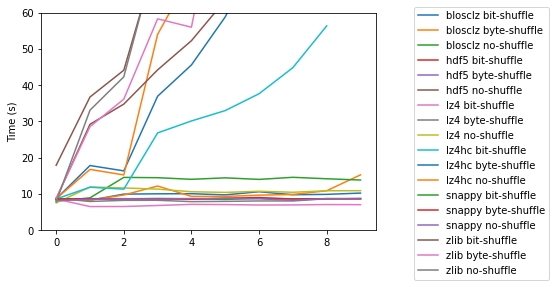

In [115]:
fig = plt.figure()
ax = plt.subplot(111)
for algorithm in algorithms:
    for shuffle in shuffles:
        print(algorithm, shuffle) 
        df_filtered = df[(df["Algorithm"] == algorithm) & (df["Shuffle"] == shuffle)]
        ax.plot(df_filtered["Compression Level"], df_filtered["Time"]/1000, label=f"{algorithm} {shuffle}")
plt.ylabel("Time (s)")
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_ylim(0, 60)

blosclz bit-shuffle
blosclz byte-shuffle
blosclz no-shuffle
hdf5 bit-shuffle
hdf5 byte-shuffle
hdf5 no-shuffle
lz4 bit-shuffle
lz4 byte-shuffle
lz4 no-shuffle
lz4hc bit-shuffle
lz4hc byte-shuffle
lz4hc no-shuffle
snappy bit-shuffle
snappy byte-shuffle
snappy no-shuffle
zlib bit-shuffle
zlib byte-shuffle
zlib no-shuffle


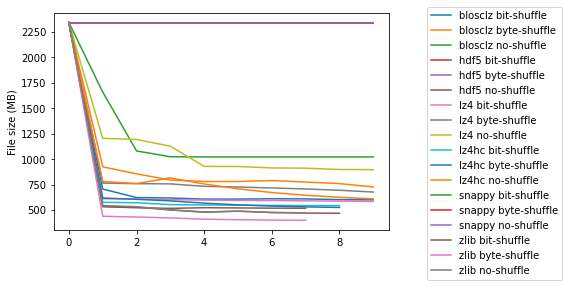

In [116]:
fig = plt.figure()
ax = plt.subplot(111)
for algorithm in algorithms:
    for shuffle in shuffles:
        print(algorithm, shuffle) 
        df_filtered = df[(df["Algorithm"] == algorithm) & (df["Shuffle"] == shuffle)]
        ax.plot(df_filtered["Compression Level"], df_filtered["Size"]/1024/1024, label=f"{algorithm} {shuffle}")
plt.ylabel("File size (MB)")
ax.legend(bbox_to_anchor=(1.1, 1.05))
#ax.set_ylim(0, 6)

blosclz bit-shuffle
blosclz byte-shuffle
blosclz no-shuffle
hdf5 bit-shuffle
hdf5 byte-shuffle
hdf5 no-shuffle
lz4 bit-shuffle
lz4 byte-shuffle
lz4 no-shuffle
lz4hc bit-shuffle
lz4hc byte-shuffle
lz4hc no-shuffle
snappy bit-shuffle
snappy byte-shuffle
snappy no-shuffle
zlib bit-shuffle
zlib byte-shuffle
zlib no-shuffle


(0.0, 900.0)

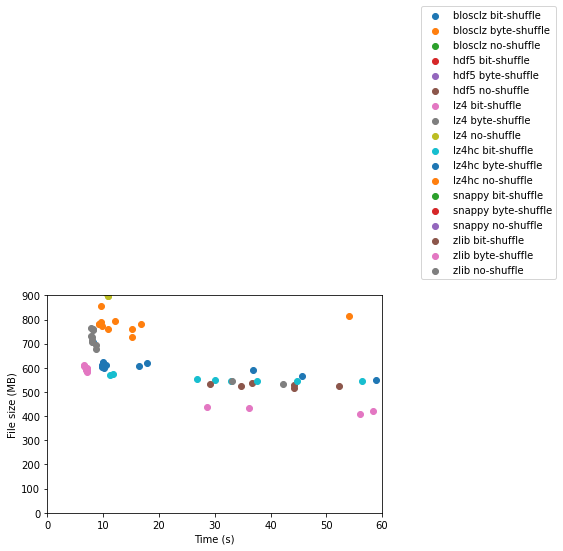

In [117]:
fig = plt.figure()
ax = plt.subplot(111)
for algorithm in algorithms:
    for shuffle in shuffles:
        print(algorithm, shuffle) 
        df_filtered = df[(df["Algorithm"] == algorithm) & (df["Shuffle"] == shuffle)]
        ax.scatter(df_filtered["Time"]/1000, df_filtered["Size"]/1024/1024, label=f"{algorithm} {shuffle}")
plt.ylabel("File size (MB)")
plt.xlabel("Time (s)")
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_xlim(0, 60)
ax.set_ylim(0, 900)

In [118]:
df[(df.Time < 10000) & (df.Size < 700000000)]

,Algorithm,Compression Level,Shuffle,Time,Size
6,blosclz,2,bit-shuffle,9930.000000,653265363.0
15,blosclz,5,bit-shuffle,9721.333333,637316729.0
21,blosclz,7,bit-shuffle,9759.333333,639567249.0
24,blosclz,8,bit-shuffle,9866.000000,631673095.0
42,lz4,1,bit-shuffle,6500.333333,640597081.0
45,lz4,2,bit-shuffle,6512.666667,638425769.0
48,lz4,3,bit-shuffle,6794.666667,631467166.0
51,lz4,4,bit-shuffle,7104.000000,626571734.0
54,lz4,5,bit-shuffle,7046.000000,623672835.0
57,lz4,6,bit-shuffle,6929.666667,621976853.0


# ZS, 165 kr evts, 2000us buffer

blosclz bit-shuffle
blosclz byte-shuffle
blosclz no-shuffle
hdf5 bit-shuffle
hdf5 byte-shuffle
hdf5 no-shuffle
lz4 bit-shuffle
lz4 byte-shuffle
lz4 no-shuffle
lz4hc bit-shuffle
lz4hc byte-shuffle
lz4hc no-shuffle
snappy bit-shuffle
snappy byte-shuffle
snappy no-shuffle
zlib bit-shuffle
zlib byte-shuffle
zlib no-shuffle


(0.0, 60.0)

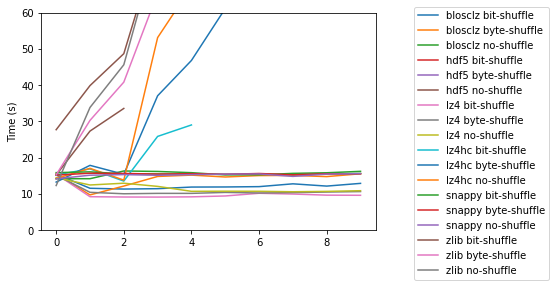

In [122]:
fig = plt.figure()
ax = plt.subplot(111)
for algorithm in algorithms:
    for shuffle in shuffles:
        print(algorithm, shuffle) 
        df_filtered = df_zs[(df_zs["Algorithm"] == algorithm) & (df_zs["Shuffle"] == shuffle)]
        ax.plot(df_filtered["Compression Level"], df_filtered["Time"]/1000, label=f"{algorithm} {shuffle}")
plt.ylabel("Time (s)")
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_ylim(0, 60)

blosclz bit-shuffle
blosclz byte-shuffle
blosclz no-shuffle
hdf5 bit-shuffle
hdf5 byte-shuffle
hdf5 no-shuffle
lz4 bit-shuffle
lz4 byte-shuffle
lz4 no-shuffle
lz4hc bit-shuffle
lz4hc byte-shuffle
lz4hc no-shuffle
snappy bit-shuffle
snappy byte-shuffle
snappy no-shuffle
zlib bit-shuffle
zlib byte-shuffle
zlib no-shuffle


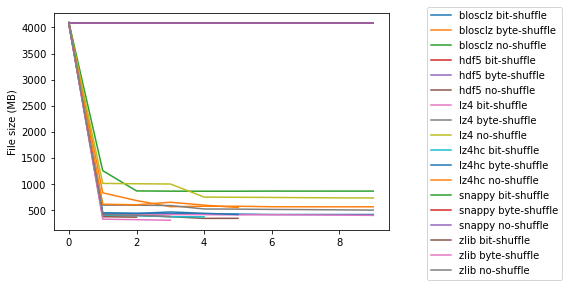

In [123]:
fig = plt.figure()
ax = plt.subplot(111)
for algorithm in algorithms:
    for shuffle in shuffles:
        print(algorithm, shuffle) 
        df_filtered = df_zs[(df_zs["Algorithm"] == algorithm) & (df_zs["Shuffle"] == shuffle)]
        ax.plot(df_filtered["Compression Level"], df_filtered["Size"]/1024/1024, label=f"{algorithm} {shuffle}")
plt.ylabel("File size (MB)")
ax.legend(bbox_to_anchor=(1.1, 1.05))
#ax.set_ylim(0, 6)

blosclz bit-shuffle
blosclz byte-shuffle
blosclz no-shuffle
hdf5 bit-shuffle
hdf5 byte-shuffle
hdf5 no-shuffle
lz4 bit-shuffle
lz4 byte-shuffle
lz4 no-shuffle
lz4hc bit-shuffle
lz4hc byte-shuffle
lz4hc no-shuffle
snappy bit-shuffle
snappy byte-shuffle
snappy no-shuffle
zlib bit-shuffle
zlib byte-shuffle
zlib no-shuffle


(0.0, 900.0)

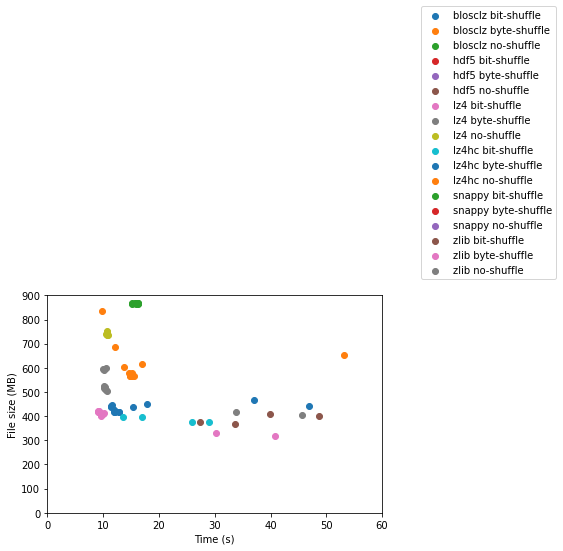

In [124]:
fig = plt.figure()
ax = plt.subplot(111)
for algorithm in algorithms:
    for shuffle in shuffles:
        print(algorithm, shuffle) 
        df_filtered = df_zs[(df_zs["Algorithm"] == algorithm) & (df_zs["Shuffle"] == shuffle)]
        ax.scatter(df_filtered["Time"]/1000, df_filtered["Size"]/1024/1024, label=f"{algorithm} {shuffle}")
plt.ylabel("File size (MB)")
plt.xlabel("Time (s)")
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_xlim(0, 60)
ax.set_ylim(0, 900)

In [126]:
df_zs[(df_zs.Time < 10000) & (df_zs.Size < 700000000)]

,Algorithm,Compression Level,Shuffle,Time,Size
39,lz4,1,bit-shuffle,9218.000000,4.433935e+08
42,lz4,2,bit-shuffle,9134.000000,4.422458e+08
45,lz4,3,bit-shuffle,9114.000000,4.363751e+08
48,lz4,4,bit-shuffle,9180.000000,4.359897e+08
51,lz4,5,bit-shuffle,9422.666667,4.313798e+08
57,lz4,7,bit-shuffle,9953.666667,4.298892e+08
60,lz4,8,bit-shuffle,9643.000000,4.265300e+08
63,lz4,9,bit-shuffle,9608.333333,4.215983e+08
